In [112]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display
pd.options.display.precision = 15
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

In [55]:
train_identity = pd.read_csv('../../ieee-fraud-detection/train_identity.csv')
train_transaction = pd.read_csv('../../ieee-fraud-detection/train_transaction.csv')
test_transaction=pd.read_csv('../../ieee-fraud-detection/test_transaction.csv')
test_identity=pd.read_csv('../../ieee-fraud-detection/test_identity.csv')
sample_submission=pd.read_csv('../../ieee-fraud-detection/sample_submission.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train_df = train_transaction.merge(train_identity, how="left", on="TransactionID")
test_df = test_transaction.merge(test_identity, how="left", on="TransactionID")

In [62]:
import scipy as sp
from scipy import stats

# datatype and shape CHK
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [63]:
feature_columns = train_df.loc[:,'isFraud']

In [64]:
train_cd = train_df.loc[:,'ProductCD']

In [65]:
train_cd_value = pd.concat([feature_columns, train_cd], axis=1)

In [109]:
train_cd_value[train_cd_value['isFraud'] == 1].shape

(20663, 2)

In [110]:
train_cd_value.isnull().sum()
# 결측값 없음

isFraud      0
ProductCD    0
dtype: int64

In [113]:
# productCD columns encoding

train_cd_encoded = pd.get_dummies(train_cd_value)


# Check
display(train_cd_encoded.tail(10))
display(train_cd_value.tail(10))

,isFraud,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W
590530,0,0,0,0,0,1
590531,0,0,0,1,0,0
590532,0,0,0,0,0,1
590533,0,0,0,0,0,1
590534,0,1,0,0,0,0
590535,0,0,0,0,0,1
590536,0,0,0,0,0,1
590537,0,0,0,0,0,1
590538,0,0,0,0,0,1
590539,0,0,0,0,0,1


,isFraud,ProductCD
590530,0,W
590531,0,R
590532,0,W
590533,0,W
590534,0,C
590535,0,W
590536,0,W
590537,0,W
590538,0,W
590539,0,W


In [114]:
train_cd_encoded.describe()

,isFraud,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W
count,590540.000000000000000,590540.000000000000000,590540.000000000000000,590540.000000000000000,590540.000000000000000,590540.000000000000000
mean,0.034990009144173,0.116027703457852,0.055921698784164,0.063838182002913,0.019690452805906,0.744521962949165
std,0.183754634178414,0.320258409989388,0.229770650409760,0.244464659454123,0.138934414602179,0.436129948214276
min,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
50%,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000
75%,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000
max,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000


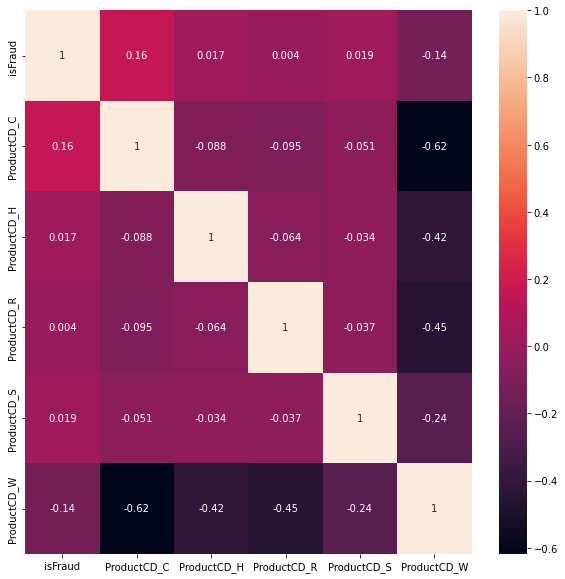

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(train_cd_encoded.corr(), annot=True)
plt.show()